In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [52]:
df=pd.read_csv('data1.csv')

In [53]:
# l1=['PM2.5', 'PM10', 'TEMP', 'BP', ' RH', 'WS','CO', 'O3', 'Nox', 'SO2']
# for i in l1:
#     for j in range(0,8431):
#         df[i][j]=float(df[i][j])
    


In [54]:
df.head()

,start,end,pm2.5,pm10,temp,bp,rh,ws,co,o3,nox,so2
0,2020-01-01 00:00:00,2020-01-01 00:15:00,961.0,NaN,35.0,740.0,89.0,0.6,7.80,NaN,354.8,1.9
1,2020-01-01 00:15:00,2020-01-01 00:30:00,961.0,NaN,34.5,740.0,87.0,0.8,4.99,NaN,252.8,NaN
2,2020-01-01 00:30:00,2020-01-01 00:45:00,NaN,NaN,34.0,740.0,86.0,0.9,3.19,NaN,192.0,NaN
3,2020-01-01 00:45:00,2020-01-01 01:00:00,565.0,718.0,34.0,740.0,85.0,1.0,1.47,NaN,124.7,NaN
4,2020-01-01 01:00:00,2020-01-01 01:15:00,565.0,718.0,34.0,740.0,85.0,0.7,1.05,NaN,117.9,NaN


In [55]:
type(df['start'][3])


str

In [6]:
# rounding off data of  temp
for i in range(0,8430):
    a=df['temp'][i]%1
    if (a>.5 or a<0.5):
        df['temp'][i]=round(df['temp'][i],0)
df.head()

from datetime import datetime
## changeing str to datetime
c=0

for  i in df['start']:

    datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    df['start'][c]=datetime_object
    c+=1
c=0

for  i in df['end']:

    datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    df['end'][c]=datetime_object
    c+=1



/home/rishabh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rishabh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/rishabh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


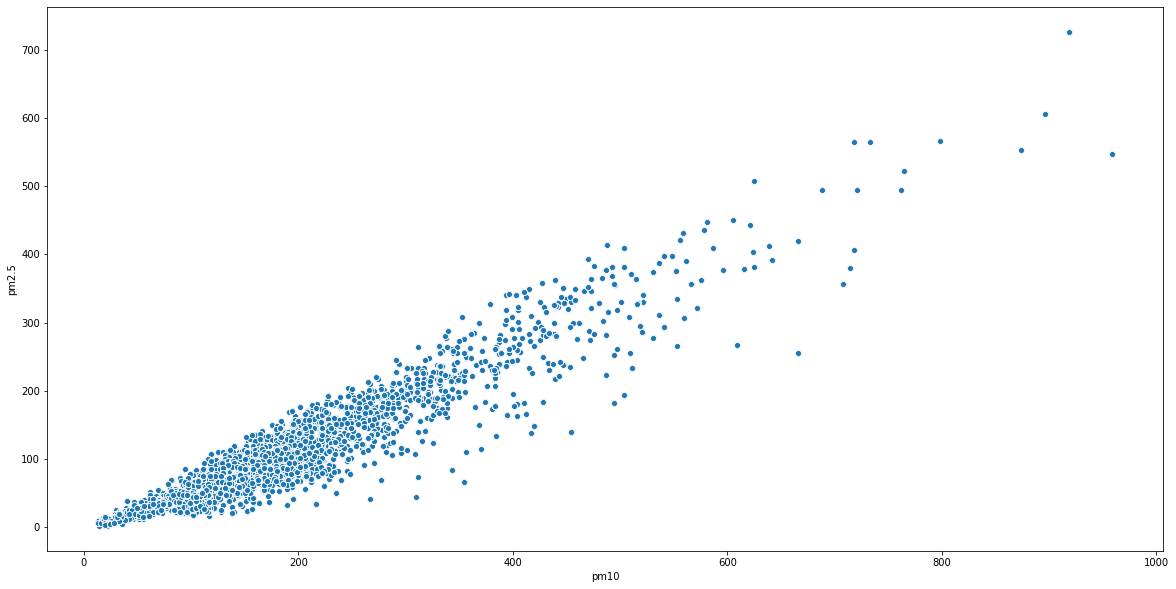

In [7]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['pm10'],df['pm2.5'])

In [25]:
df.corr()

,pm2.5,pm10,temp,bp,rh,ws,co,o3,nox,so2
pm2.5,1.000000,0.941036,0.156509,-0.012413,0.373443,-0.437476,0.558734,-0.243968,0.671095,-0.047608
pm10,0.941036,1.000000,0.127690,0.059367,0.238088,-0.443919,0.681236,-0.203814,0.755892,0.016451
temp,0.156509,0.127690,1.000000,-0.069313,0.214279,-0.194934,0.147600,-0.152661,0.147981,-0.097695
bp,-0.012413,0.059367,-0.069313,1.000000,-0.285590,0.007074,0.013450,0.156567,0.022355,0.129230
rh,0.373443,0.238088,0.214279,-0.285590,1.000000,-0.427490,0.255405,-0.426818,0.291516,-0.272389
ws,-0.437476,-0.443919,-0.194934,0.007074,-0.427490,1.000000,-0.471325,0.280902,-0.500114,0.066306
co,0.558734,0.681236,0.147600,0.013450,0.255405,-0.471325,1.000000,-0.225816,0.905559,-0.089249
o3,-0.243968,-0.203814,-0.152661,0.156567,-0.426818,0.280902,-0.225816,1.000000,-0.218170,0.238988
nox,0.671095,0.755892,0.147981,0.022355,0.291516,-0.500114,0.905559,-0.218170,1.000000,-0.091476
so2,-0.047608,0.016451,-0.097695,0.129230,-0.272389,0.066306,-0.089249,0.238988,-0.091476,1.000000


/home/rishabh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rishabh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


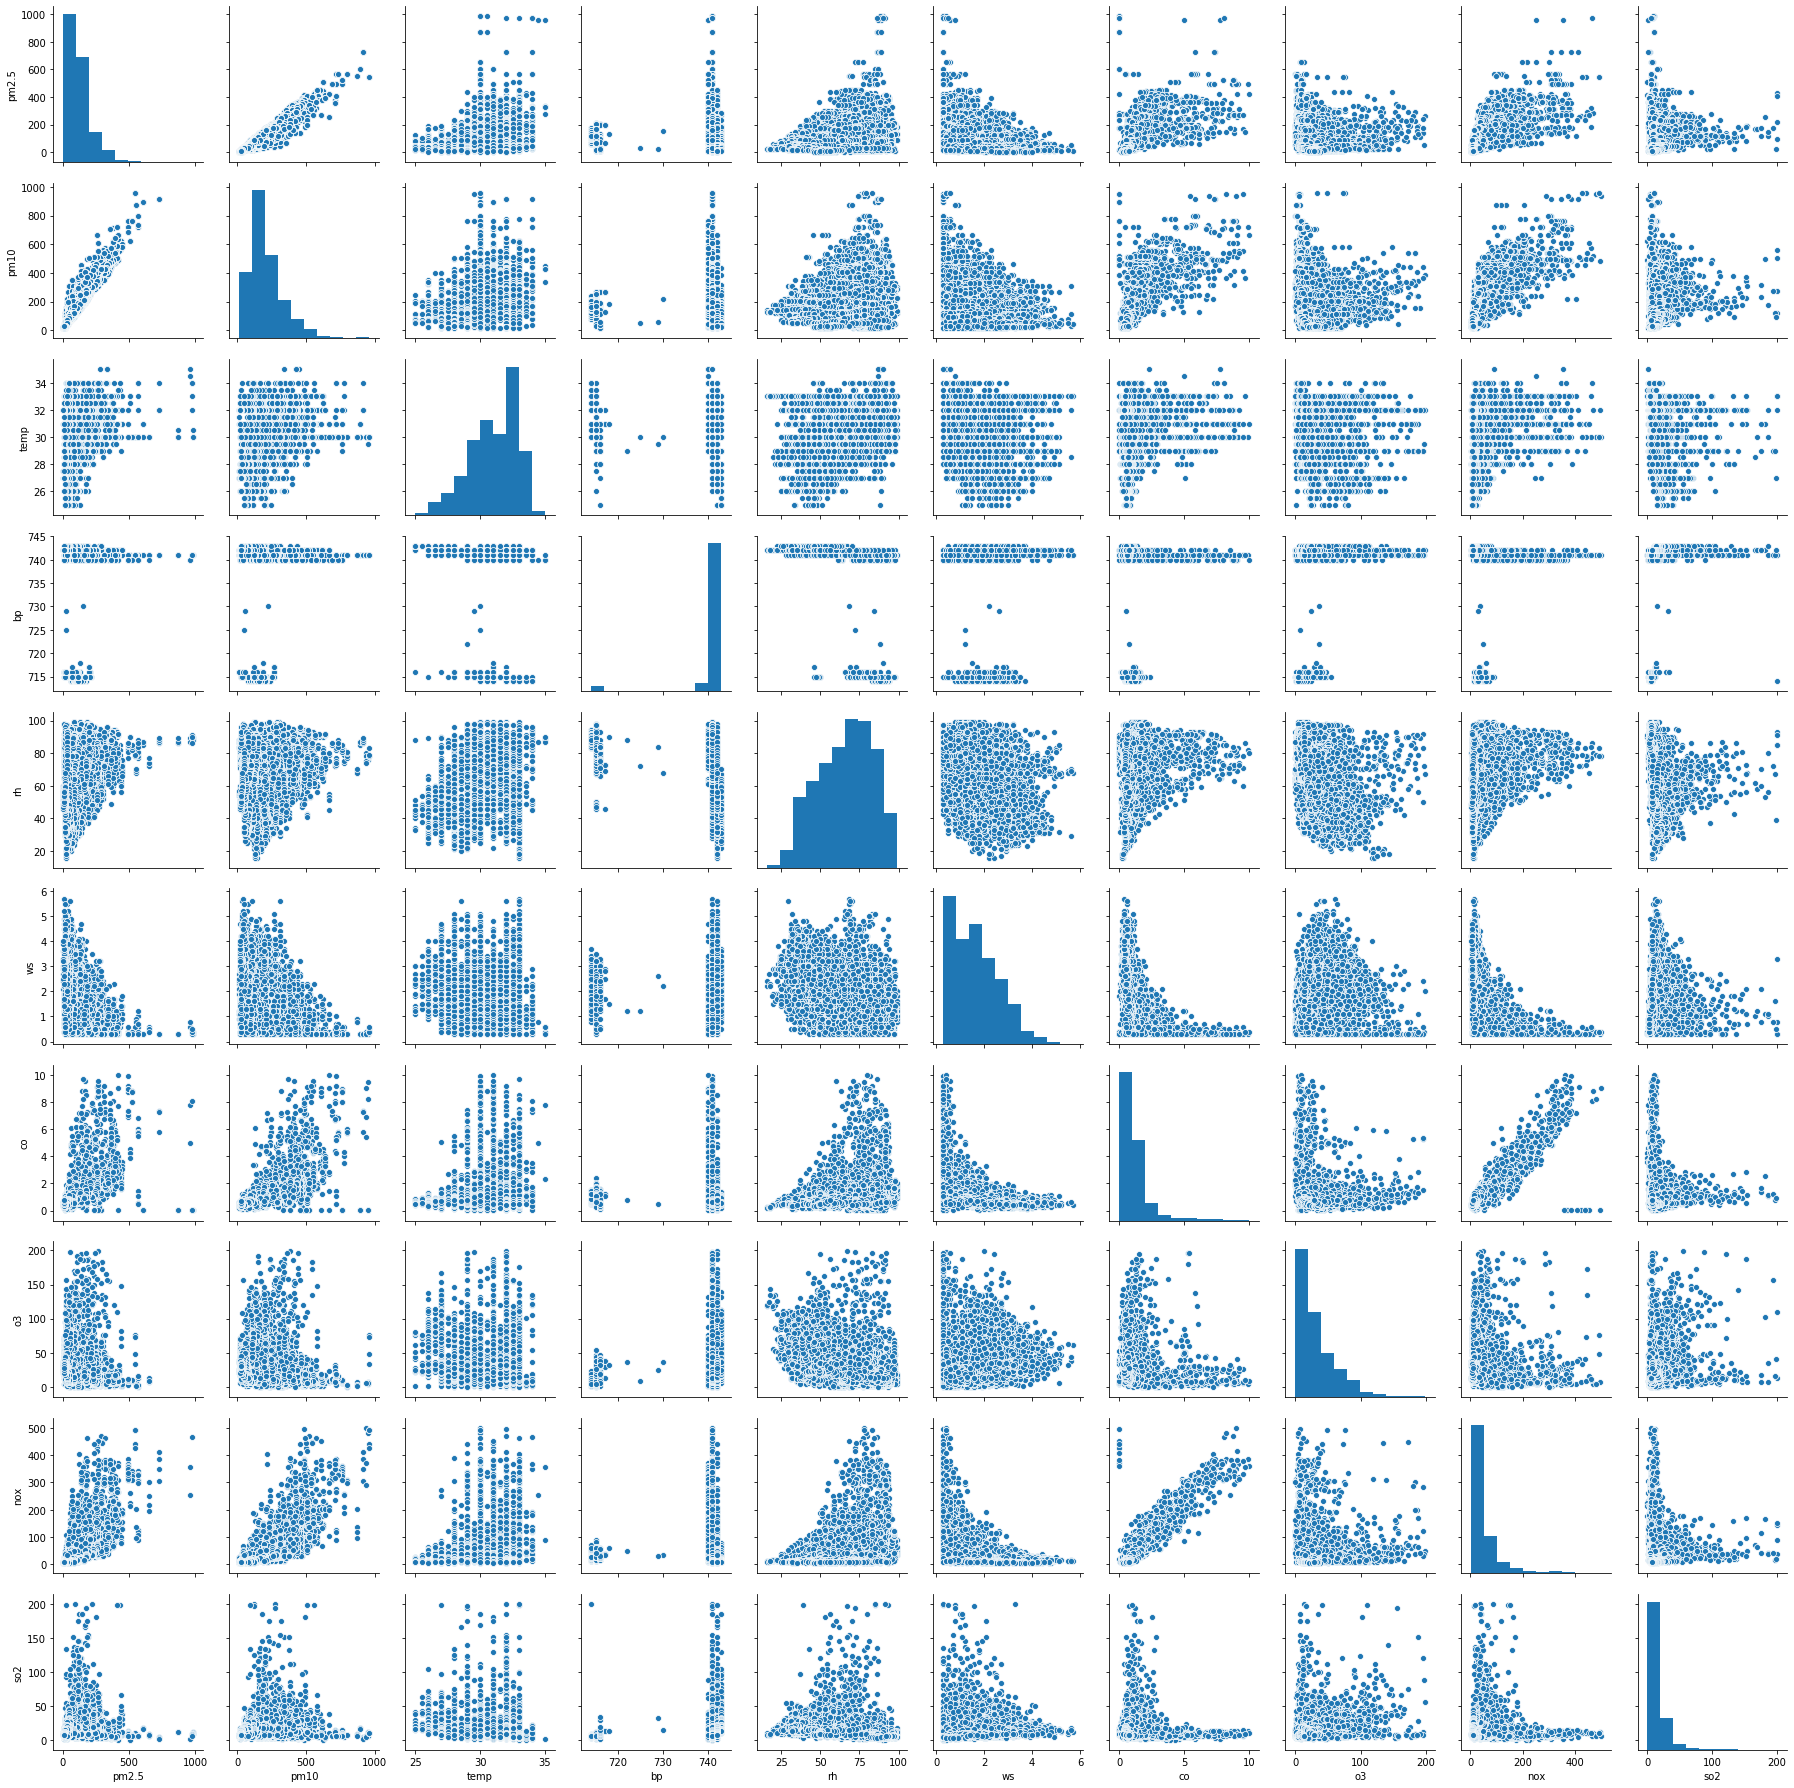

In [8]:
sns.pairplot(df)

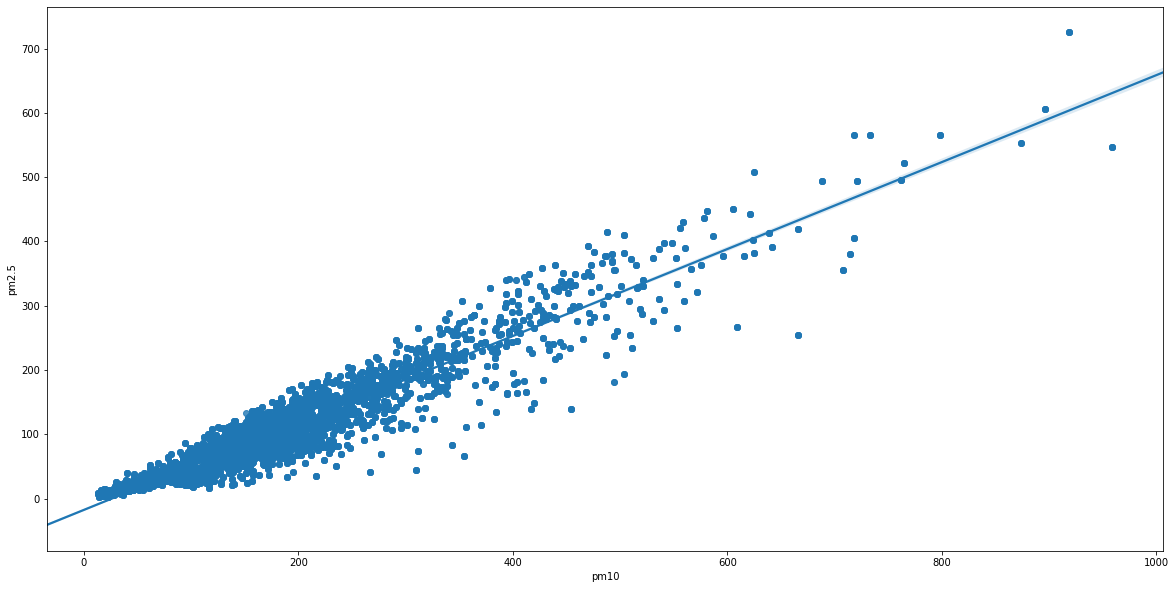

In [67]:
plt.figure(figsize=(20,10))

sns.regplot('pm10','pm2.5',data=df)

In [24]:
for i in range(8431):
    df['date'].iloc[i]=str(df['start'].iloc[i].day )+'/'+str(df['start'].iloc[i].month)
df.to_csv('data2.csv',index=False)

/home/rishabh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


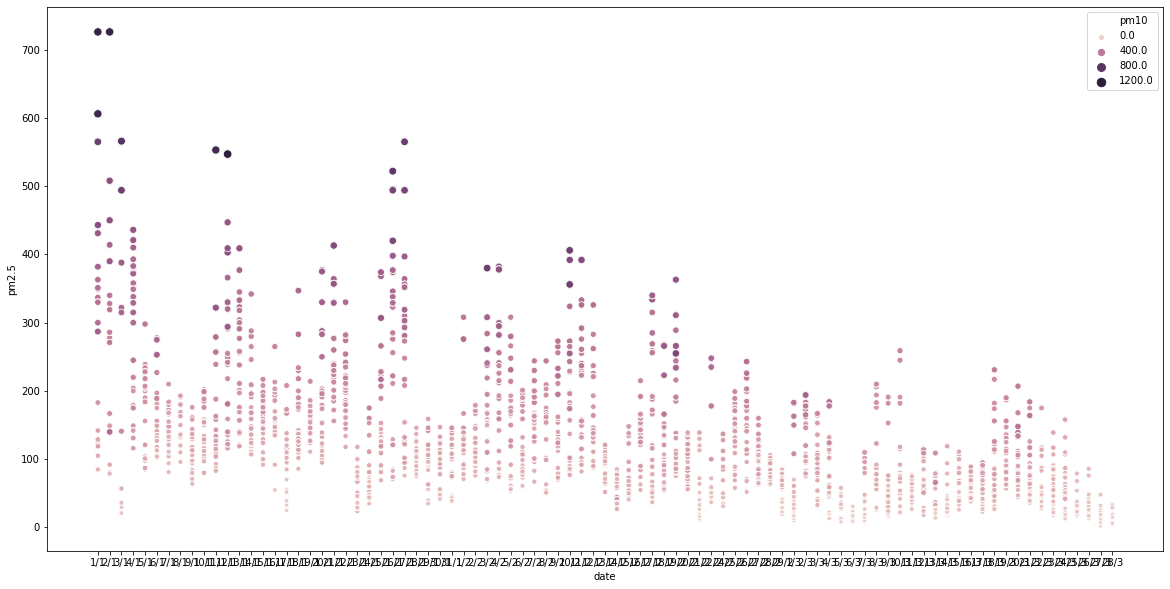

In [17]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['date'],y='pm2.5',data=df,size='pm10',hue='pm10')

In [18]:
df1=df.groupby(df['date'],sort=False).mean()  
df1['temp']=df1['temp'].round(1)
df1.round(2)
df1

,pm2.5,pm10,temp,bp,rh,ws,co,o3,nox,so2
date,,,,,,,,,,
1/1,397.936842,417.312500,31.5,741.020833,74.385417,0.947917,1.866667,31.435000,109.658667,16.213699
2/1,274.507042,468.717391,31.0,741.395833,72.781250,0.761458,2.724568,20.299804,152.146988,17.365385
3/1,211.292683,341.833333,30.8,741.329787,71.781250,0.801053,2.860988,16.130864,142.188172,21.660000
4/1,290.552083,405.702128,30.7,741.281250,71.270833,0.919792,2.662963,35.221333,137.995699,17.970370
5/1,187.375000,268.831579,30.8,741.281250,62.687500,1.328125,1.215062,38.981642,58.250538,17.348148
...,...,...,...,...,...,...,...,...,...,...
24/3,61.055556,114.943820,29.6,741.589474,54.431579,1.435789,0.800395,31.448587,17.465556,21.146753
25/3,35.549451,68.641304,29.6,741.989583,58.302083,1.522917,0.660633,21.313146,12.635484,12.198750
26/3,36.462366,74.966292,29.4,742.010417,58.989583,1.889583,0.615185,17.958925,11.645652,11.345000


In [19]:
df1['date']=df1.index

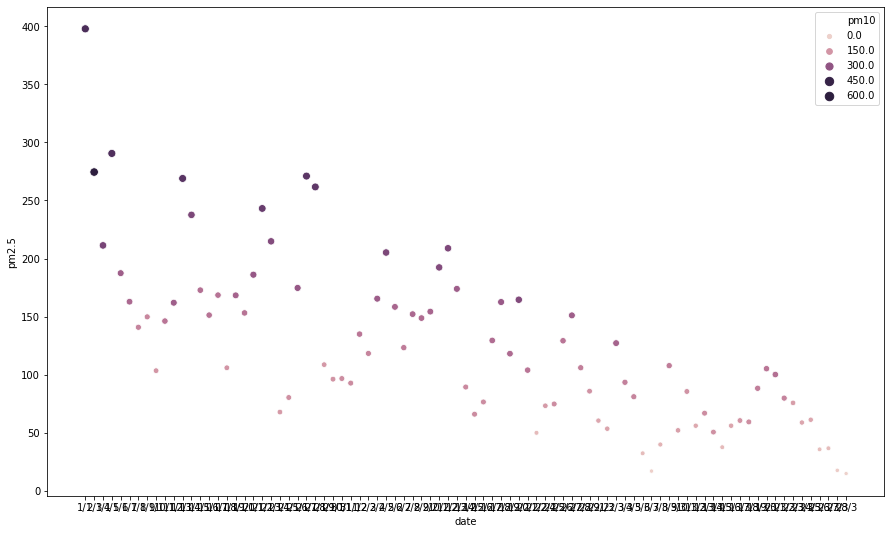

In [20]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=df1.index,y='pm2.5',data=df1,size='pm10',hue='pm10')

<Figure size 1440x720 with 0 Axes>

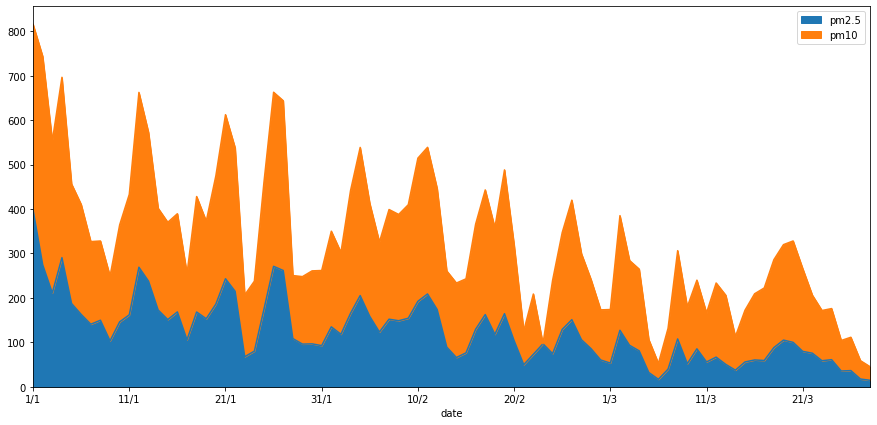

In [21]:
plt.figure(figsize=(20,10))

df1.plot('date',y=['pm2.5','pm10'],kind='area',figsize=(15,7))

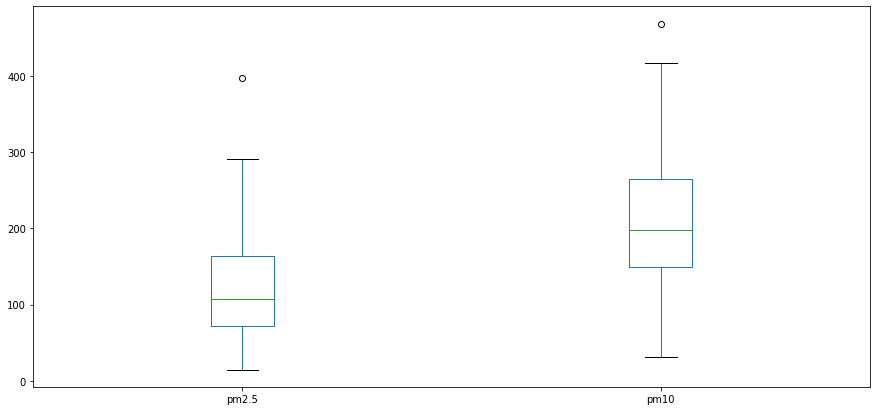

In [22]:


df1.plot('date',y=['pm2.5','pm10'],kind='box',figsize=(15,7))

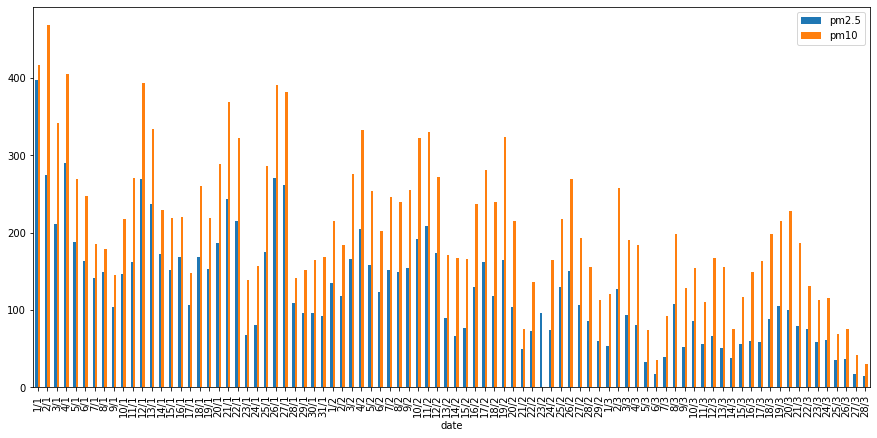

In [23]:
df1.plot('date',y=['pm2.5','pm10'],kind='bar',figsize=(15,7))